In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors
import geopandas as gpd
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp

%load_ext autoreload
%autoreload 2

2023-08-29 18:42:57.634725: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42

# save figure with no pad
mpl.rcParams['savefig.pad_inches'] = 0.5
mpl.rcParams['savefig.bbox'] = 'tight'

# set axes width
mpl.rcParams['axes.linewidth'] = 0.2
mpl.rcParams['xtick.minor.pad'] = 0
mpl.rcParams['xtick.major.pad'] = 0
mpl.rcParams['ytick.minor.pad'] = 0
mpl.rcParams['ytick.major.pad'] = 0
mpl.rcParams['xtick.minor.width'] = 0.2
mpl.rcParams['xtick.major.width'] = 0.2
mpl.rcParams['ytick.minor.width'] = 0.2
mpl.rcParams['ytick.major.width'] = 0.2

# use colorblind seaborn style
plt.style.use('seaborn-colorblind')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
adata = sc.read_h5ad('../DataSubmission/GBM_Linnarsson_EEL.h5ad')

In [5]:
a = ['Endothelial' if x.count('Endothelial') else x for x in adata.obs['m-states']]
adata.obs['m-states'] = pd.Categorical(['Mural' if x.count('Mural') else x for x in a])

In [6]:
GW_clusters= GW = ['GW-like 1', 'GW-like 2', 'GW-like 3', 'GW-like 4', 'GW-like 5', 'GW-like 6', 'GW-like 7', 'GW-like 8','Mural', 'Endothelial']
GW = adata[adata.obs['m-states'].isin(GW_clusters)]#.cat.categories


In [7]:
adata

AnnData object with n_obs × n_vars = 6139386 × 878
    obs: 'Area', 'CellID', 'Centroid', 'Polygons', 'Sample', 'X', 'Y', 'batch', 'ID', 'CellularNgh', 'm-states', 'm-states80'
    var: 'Accession', 'Gene'
    obsm: 'spatial'

# SL035B

In [8]:
clusters

NameError: name 'clusters' is not defined

In [9]:
paletteGW = {
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 7': '#e43c96',
    'GW-like 8': '#C50F53',
    'GW-like 4': '#A40447',
    'GW-like 6': '#840034',
    
    'Endothelial':'#8c14fc', # '#d5b8ff',  
    'Mural': '#8c14fc'
    
}
from PIL import Image


INFO:root:First filter, 159657 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 1918 cells left


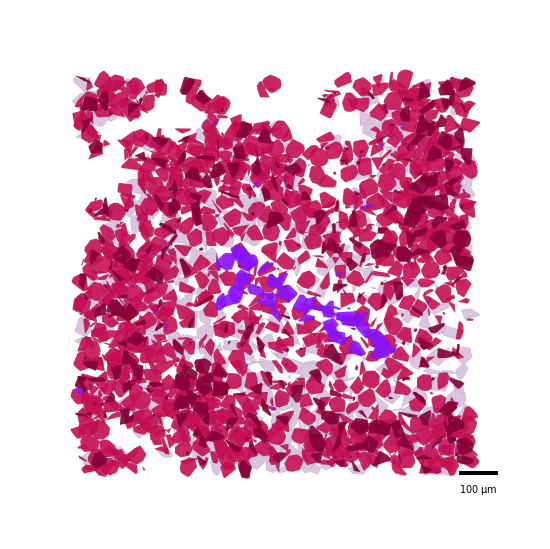

In [11]:
xlim = (8150,9150)
ylim=(3850,4850)

xlim = (11200, 12200)
ylim= (5500, 6500)

he = Image.open("/wsfish/glioblastoma/stainings/aligned_imgs/HE/HE_035B_1_aligned_5d.tif")
sp.pl.plot_polygons(
    GW,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['GW-like 1','GW-like 8', 'GW-like 6','Mural'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=False,
    palette= paletteGW,
    figsize=(5,5),
)

INFO:root:First filter, 23149 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2409 cells left


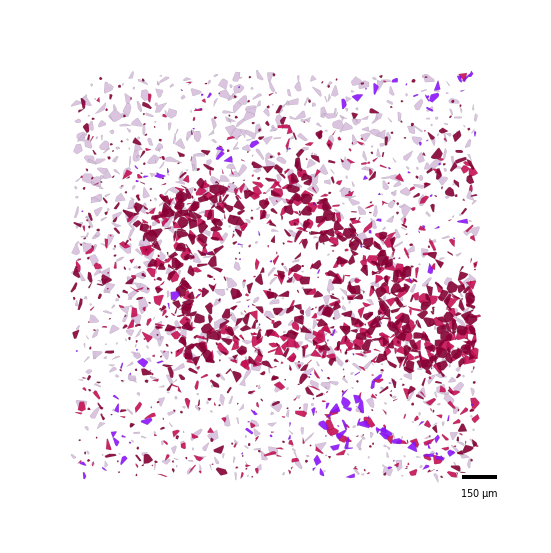

In [17]:

xlim = (7300,9000)
ylim=(2100,3800)
sp.pl.plot_polygons(
    GW,
    sample='SL046C',
    cluster_key='m-states',
    clusters=['GW-like 1','GW-like 8', 'GW-like 6','Mural'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=False,
    palette= paletteGW,
    figsize=(5,5),
    
)

INFO:root:First filter, 15571 cells left
INFO:root:Zoom filter, 15571 cells left


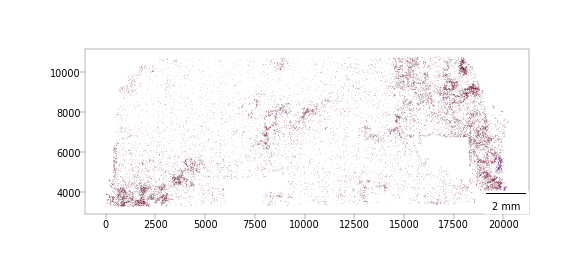

In [78]:
from PIL import Image

#xlim = (5500,7000)
#ylim=(1300,2800)
sp.pl.plot_polygons(
    GW,
    sample='SL002',
    cluster_key='m-states',
    clusters=['GW-like 1','GW-like 8', 'GW-like 6','Mural'], #[45,76],
    alpha=0.9,
    show_axis=True,
    palette= paletteGW,
    figsize=(5,5),

)

INFO:root:First filter, 87913 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 10431 cells left


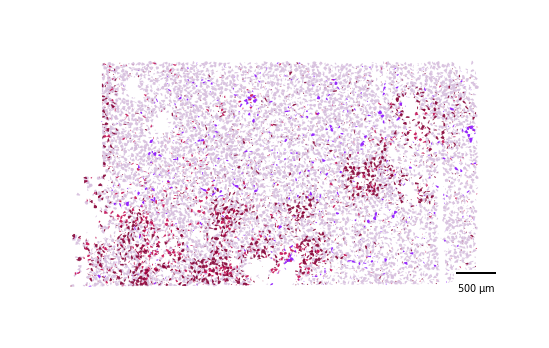

In [21]:
sp.pl.plot_polygons(
    GW,
    sample='SL002',
    cluster_key='m-states',
    clusters=['GW-like 1','GW-like 8', 'GW-like 6','Endothelial'], #[45,76],
    alpha=0.9,
    show_axis=False,
    palette= paletteGW,
    figsize=(5,5),

    xlim=(0,5000),
    ylim=(0,6000),

)

INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


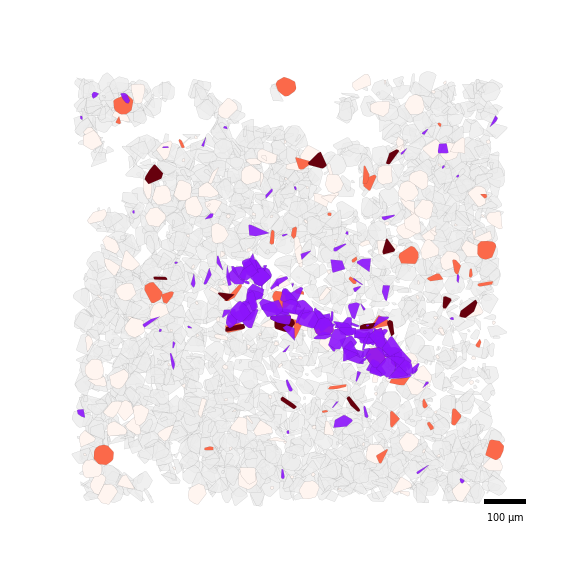

In [23]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['MGP'],
    cmap='Reds',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.995,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.savefig('figures/MGP.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')

INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


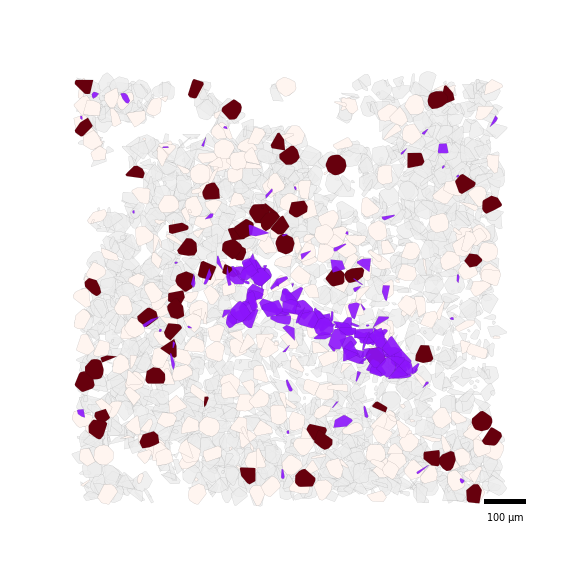

In [24]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['PLAU'],
    cmap='Reds',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,

    mquant=0.99,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()

INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


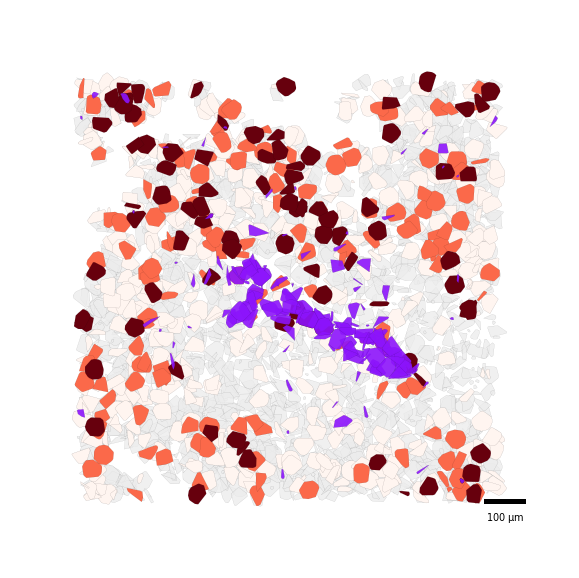

In [25]:
xlim = (8150,9150)
ylim=(3850,4850)

xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['SERPINE1'],
    cmap='Reds',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,

    mquant=0.99,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()

INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


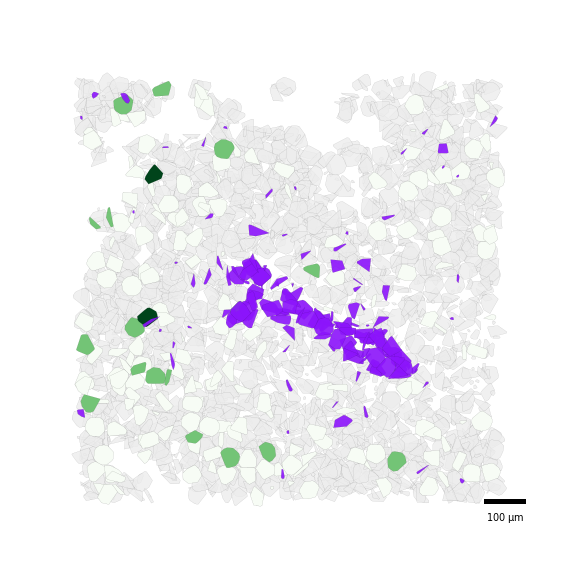

In [14]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['IL17RA'],
    cmap='Greens',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.99999,
    ax = ax
)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()

INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


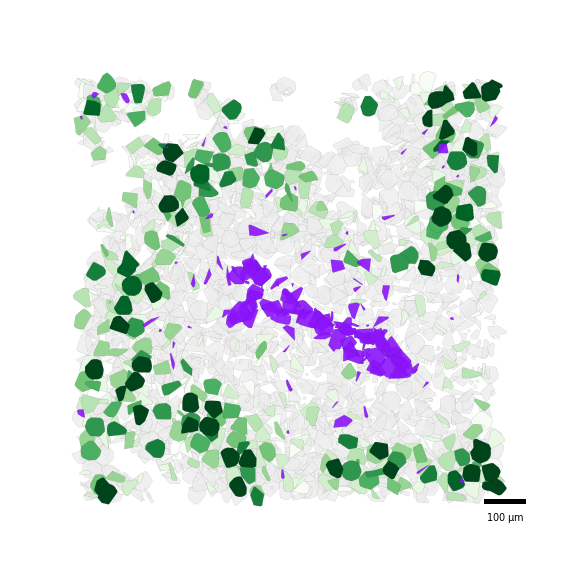

In [11]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['VEGFA'],
    cmap='Greens',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    mquant=0.99,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()

INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


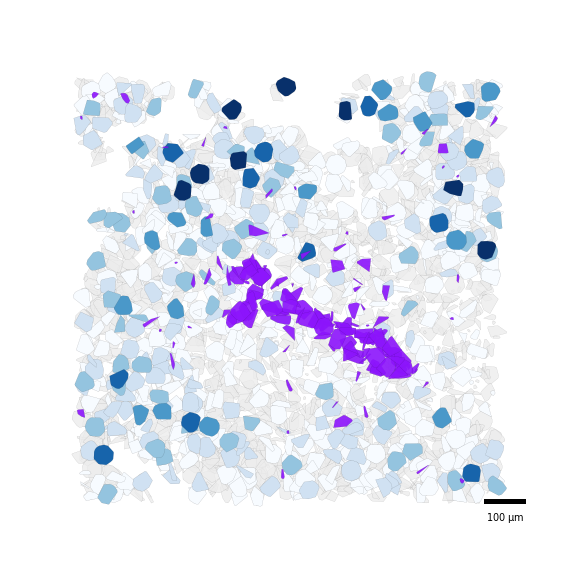

In [33]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['ANXA1'],
    cmap='Blues',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.999,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()

INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


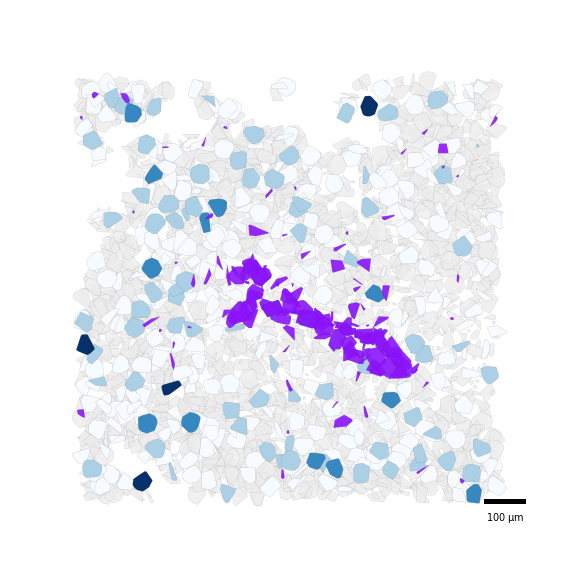

In [34]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['ANXA2'],
    cmap='Blues',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,

    mquant=0.999,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], 
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()

INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


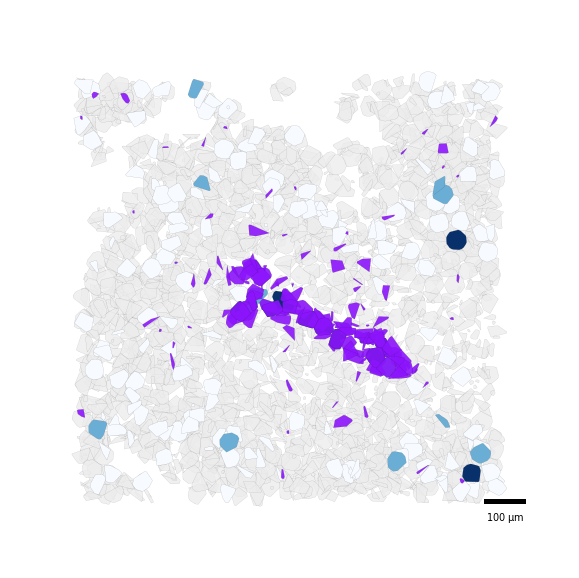

In [39]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['EPAS1'],
    cmap='Blues',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    #figsize=(5,5),
    mquant=0.999,
    ax = ax
)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()

INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


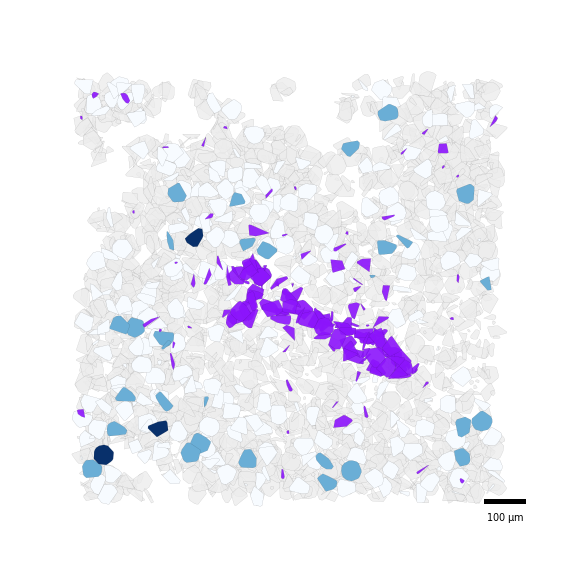

In [38]:
xlim = (8150,9150)
ylim=(3850,4850)

xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['HMOX1'],
    cmap='Blues',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    mquant=0.999,
    ax = ax
)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()

INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


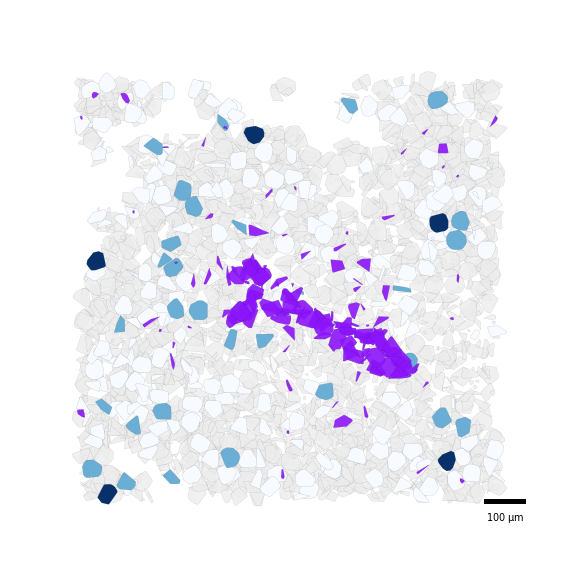

In [35]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['HIF1A'],
    cmap='Blues',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    mquant=0.999,
    ax = ax
)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()

INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


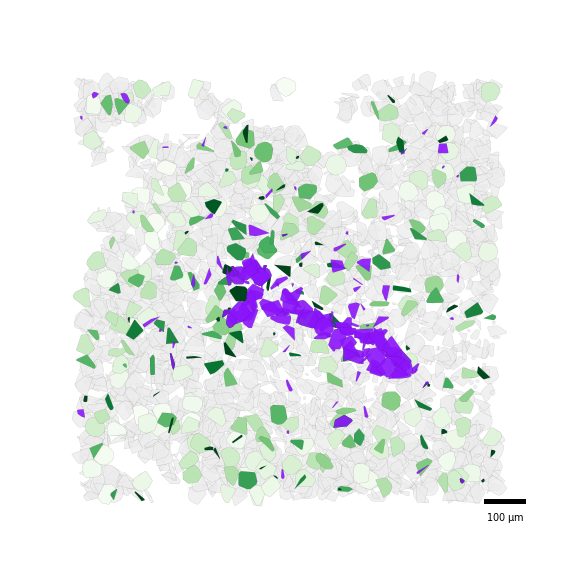

In [101]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['TGFBI'],
    cmap='Greens',
xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,

    mquant=0.99,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()


INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


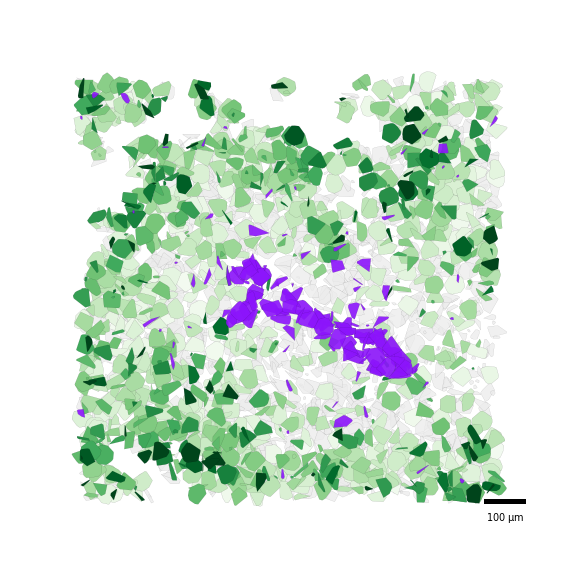

In [100]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))

sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['IGFBP5'],
    cmap='Greens',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    mquant=0.99,
    ax = ax
)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()


INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


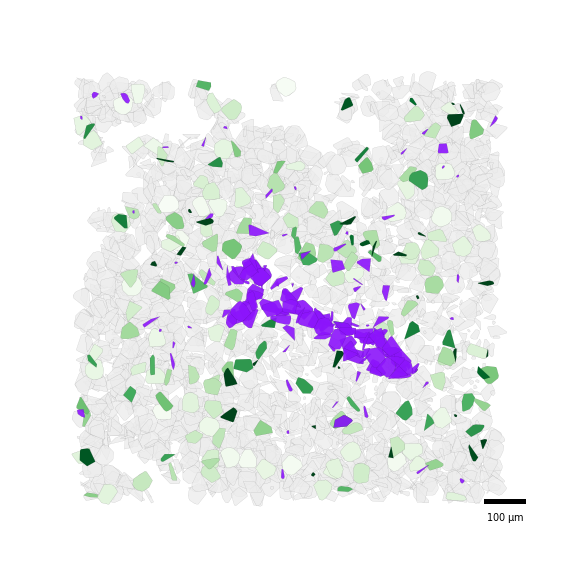

In [102]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['NOTCH1'],
    cmap='Greens',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    mquant=0.99,
    ax = ax

)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.savefig('figures/NOTCH1.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')


INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


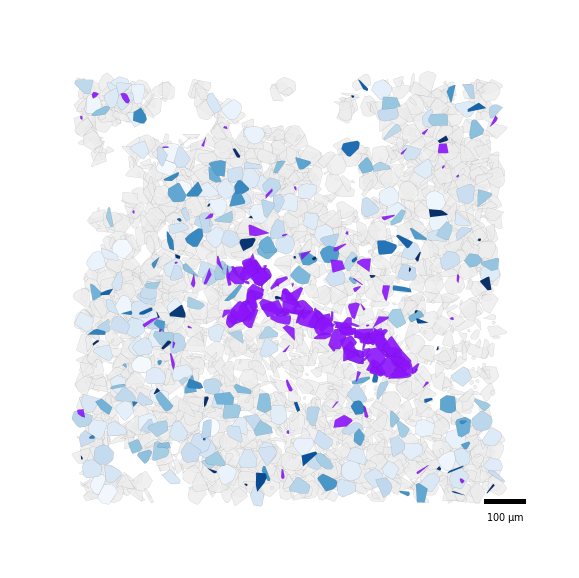

In [103]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['HMOX1'],
    cmap='Blues',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    mquant=0.99,
    ax = ax
    
)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()


INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


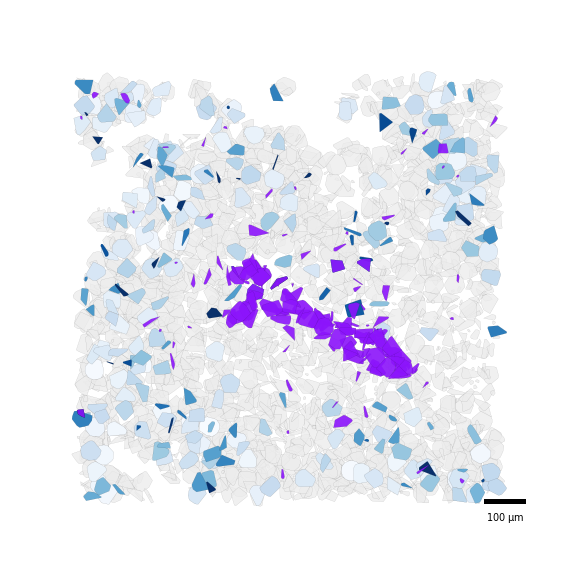

In [104]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['SLC2A1'],
    cmap='Blues',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    mquant=0.99,
    ax = ax
    
)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.savefig('figures/SLC2A1.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')


INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


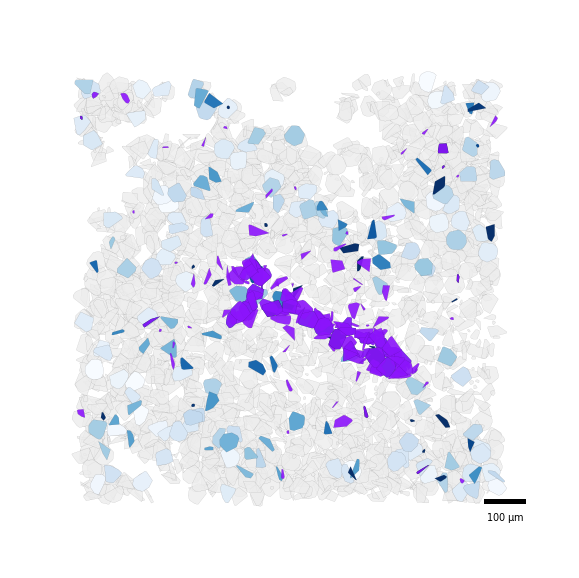

In [105]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['EPAS1'],
    cmap='Blues',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    mquant=0.99,
    ax = ax
    
)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.savefig('figures/EPAS1.svg',dpi=300, format='svg', transparent=True,bbox_inches='tight')


INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


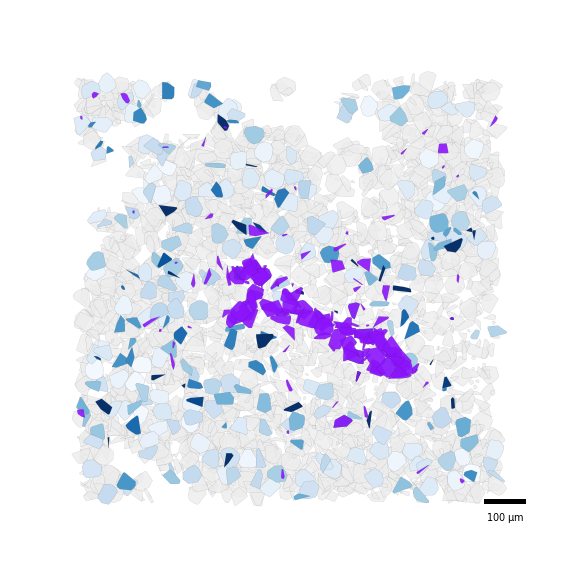

In [106]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['HIF1A'],
    cmap='Blues',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    mquant=0.99,
    ax = ax
)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()


INFO:root:First filter, 209525 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 2502 cells left
INFO:root:First filter, 7656 cells left
INFO:root:Selecting cells in zoom area
INFO:root:Zoom filter, 151 cells left


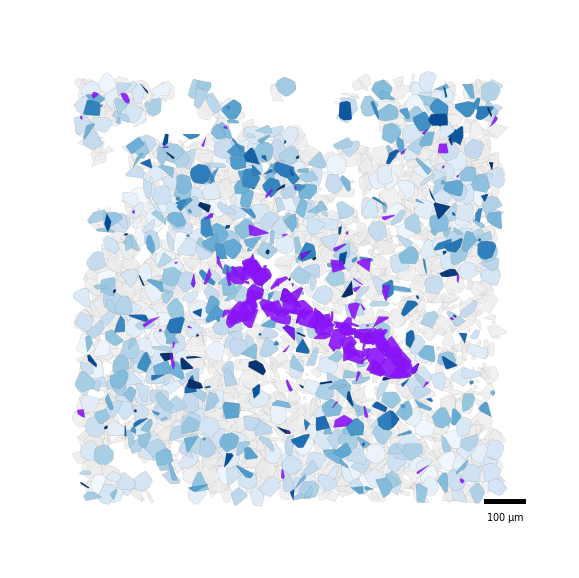

In [107]:
xlim = (11200, 12200)
ylim= (5500, 6500)

fig,ax = plt.subplots(1,1 ,figsize=(5,5))
sp.pl.plot_polygons_expression(
    GW,
    sample='SL035B',
    genes=['ANXA1'],
    cmap='Blues',
    xlim=xlim,
    ylim=ylim,
    alpha=1,
    show_axis=False,
    
    mquant=0.99,
    ax = ax
)

sp.pl.plot_polygons(
    adata,
    sample='SL035B',
    cluster_key='m-states',
    clusters=['Mural','Endothelial'], #[45,76],
    xlim=xlim,
    ylim=ylim,
    alpha=0.9,
    show_axis=True,
    palette= {'Endothelial':'#8c14fc',  'Mural': '#8c14fc'},
    ax=ax,
)

plt.show()


In [111]:
import seaborn as sns

In [112]:
greens = sns.color_palette("Greens", 8)

In [120]:
np.array(greens[-4])*255

array([ 92.8       , 184.62745098, 106.62745098])

In [113]:
blues = sns.color_palette("Blues", 8)

In [119]:
np.array(blues[-4])*255

array([ 88.34901961, 161.2627451 , 206.72156863])